In [1]:
import json
import plotly
import warnings
import numpy as np
import plotly.graph_objects as go

from glob import glob
from scipy.stats import poisson, chi2
from plotly.subplots import make_subplots

plotly.offline.init_notebook_mode()
warnings.filterwarnings('ignore')

In [2]:
max_goals = 5
decimals = 4

In [3]:
observed_data = np.zeros((max_goals + 1, max_goals + 1))
home_goals = 0
away_goals = 0
games = 0
for file in glob('data/BrazilianSoccerData/results/Serie_A/*/games.json'):
    with open(file, 'r') as f: data = json.load(f)
    for game in data:
        result = data[game]['Result'].upper().split(' X ')
        score_h, score_a = int(result[0]), int(result[1])
        
        games += 1
        home_goals += score_h
        away_goals += score_a
        observed_data[min(score_a, max_goals), min(score_h, max_goals)] += 1

home_mean, away_mean = home_goals / games, away_goals / games
poisson_home, poisson_away = poisson(home_mean), poisson(away_mean)
home_probs = [poisson_home.pmf(x) for x in [*range(max_goals)]]
away_probs = [poisson_away.pmf(x) for x in [*range(max_goals)]]
home_probs.append(1 - sum(home_probs))
away_probs.append(1 - sum(away_probs))
home_probs, away_probs = np.array(home_probs), np.array(away_probs)
theorical_data = np.zeros((max_goals + 1, max_goals + 1))
for i in range(max_goals + 1):
    for j in range(max_goals + 1):
        theorical_data[j, i] = home_probs[i] * away_probs[j]

In [4]:
stat_test = 0
for i in range(max_goals + 1):
    for j in range(max_goals + 1):
        if observed_data[i, j] != 0 and theorical_data[i, j] != 0:
            num = (observed_data[i, j] - theorical_data[i, j] * games) ** 2
            den = (theorical_data[i, j] * games)
            stat_test += num / den

p_value = 1 - chi2(25).cdf(stat_test)
p_value, stat_test, games

(0.00730804120127404, 45.51140234921905, 3939)

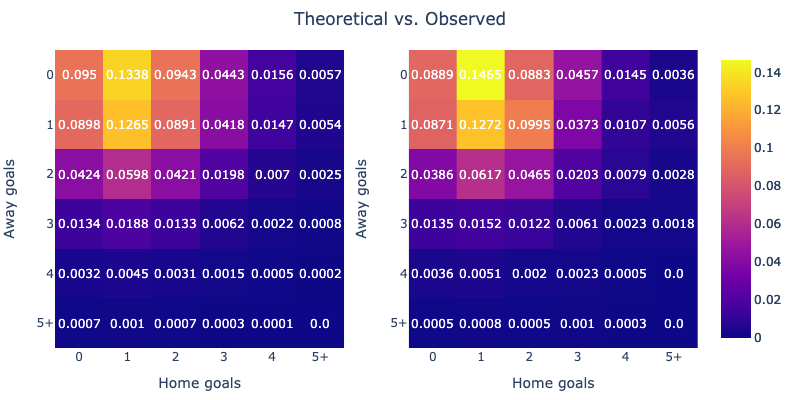

In [5]:
observed_data = np.round(observed_data / games, decimals)
theorical_data = np.round(theorical_data, decimals)

labels = [f'{i}' for i in range(max_goals)] + [f'{max_goals}+']
z_min = min(np.min(theorical_data), np.min(observed_data))
z_max = max(np.max(theorical_data), np.max(observed_data))

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Heatmap(z=theorical_data, x=labels, y=labels, zmin=z_min, zmax=z_max, text=theorical_data, hoverinfo='text'), row=1, col=1)
fig.add_trace(go.Heatmap(z=observed_data, x=labels, y=labels, zmin=z_min, zmax=z_max), row=1, col=2)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=labels[j],
            y=labels[i],
            text=str(theorical_data[i][j]),
            showarrow=False,
            font=dict(color='white', size=12),
            xref='x1',
            yref='y1'
        )

        fig.add_annotation(
            x=labels[j],
            y=labels[i],
            text=str(observed_data[i][j]),
            showarrow=False,
            font=dict(color='white', size=12),
            xref='x2',
            yref='y2'
        )

fig.update_xaxes(side='top', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=1)
fig.update_yaxes(autorange='reversed', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=1)
fig.update_xaxes(side='top', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=2)
fig.update_yaxes(autorange='reversed', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=2)
fig.update_layout(
    xaxis=dict(side='bottom', title='Home goals'),
    yaxis=dict(autorange='reversed', title='Away goals'),
    xaxis2=dict(side='bottom', title='Home goals'),
    yaxis2=dict(autorange='reversed', title='Away goals'),
    title=dict(text='Theoretical vs. Observed', x=0.5)
)

fig.update_layout(height=400, width=800, margin=dict(l=50, r=50, t=50, b=50))
fig.show('png')

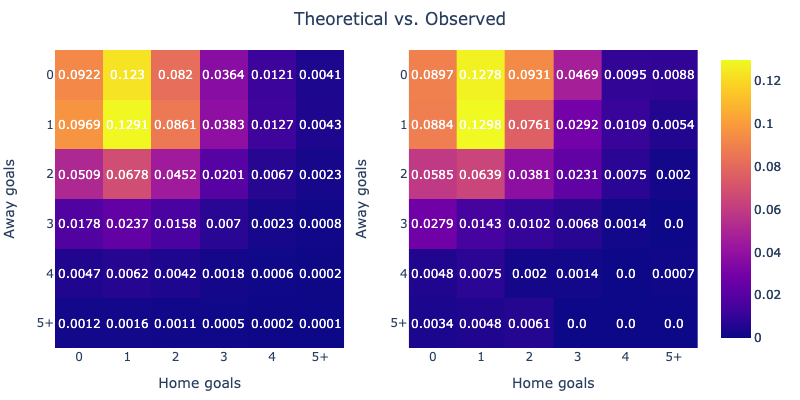

In [6]:
observed_data = np.zeros((max_goals + 1, max_goals + 1))
home_goals = 0
away_goals = 0
games = 0
for file in glob('data/BrazilianSoccerData/results/CdB/*/games.json'):
    with open(file, 'r') as f: data = json.load(f)
    for game in data:
        result = data[game]['Result'].upper().split(' X ')
        score_h, score_a = int(result[0]), int(result[1])
        
        games += 1
        home_goals += score_h
        away_goals += score_a
        observed_data[min(score_a, max_goals), min(score_h, max_goals)] += 1

home_mean, away_mean = home_goals / games, away_goals / games
poisson_home, poisson_away = poisson(home_mean), poisson(away_mean)
home_probs = [poisson_home.pmf(x) for x in [*range(max_goals)]]
away_probs = [poisson_away.pmf(x) for x in [*range(max_goals)]]
home_probs.append(1 - sum(home_probs))
away_probs.append(1 - sum(away_probs))
home_probs, away_probs = np.array(home_probs), np.array(away_probs)
theorical_data = np.zeros((max_goals + 1, max_goals + 1))
for i in range(max_goals + 1):
    for j in range(max_goals + 1):
        theorical_data[j, i] = home_probs[i] * away_probs[j]

observed_data = np.round(observed_data / games, decimals)
theorical_data = np.round(theorical_data, decimals)

labels = [f'{i}' for i in range(max_goals)] + [f'{max_goals}+']
z_min = min(np.min(theorical_data), np.min(observed_data))
z_max = max(np.max(theorical_data), np.max(observed_data))

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Heatmap(z=theorical_data, x=labels, y=labels, zmin=z_min, zmax=z_max, text=theorical_data, hoverinfo='text'), row=1, col=1)
fig.add_trace(go.Heatmap(z=observed_data, x=labels, y=labels, zmin=z_min, zmax=z_max), row=1, col=2)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=labels[j],
            y=labels[i],
            text=str(theorical_data[i][j]),
            showarrow=False,
            font=dict(color='white', size=12),
            xref='x1',
            yref='y1'
        )

        fig.add_annotation(
            x=labels[j],
            y=labels[i],
            text=str(observed_data[i][j]),
            showarrow=False,
            font=dict(color='white', size=12),
            xref='x2',
            yref='y2'
        )

fig.update_xaxes(side='top', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=1)
fig.update_yaxes(autorange='reversed', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=1)
fig.update_xaxes(side='top', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=2)
fig.update_yaxes(autorange='reversed', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=2)
fig.update_layout(
    xaxis=dict(side='bottom', title='Home goals'),
    yaxis=dict(autorange='reversed', title='Away goals'),
    xaxis2=dict(side='bottom', title='Home goals'),
    yaxis2=dict(autorange='reversed', title='Away goals'),
    title=dict(text='Theoretical vs. Observed', x=0.5)
)

fig.update_layout(height=400, width=800, margin=dict(l=50, r=50, t=50, b=50))
fig.show('png')

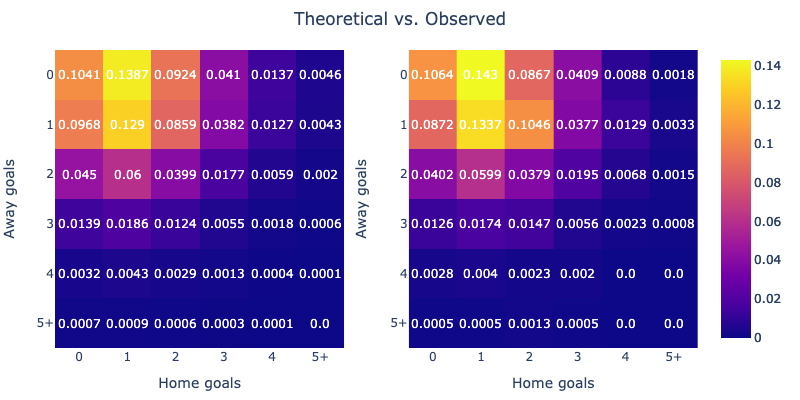

In [7]:
observed_data = np.zeros((max_goals + 1, max_goals + 1))
home_goals = 0
away_goals = 0
games = 0
for file in glob('data/BrazilianSoccerData/results/Serie_B/*/games.json'):
    with open(file, 'r') as f: data = json.load(f)
    for game in data:
        result = data[game]['Result'].upper().split(' X ')
        score_h, score_a = int(result[0]), int(result[1])
        
        games += 1
        home_goals += score_h
        away_goals += score_a
        observed_data[min(score_a, max_goals), min(score_h, max_goals)] += 1

home_mean, away_mean = home_goals / games, away_goals / games
poisson_home, poisson_away = poisson(home_mean), poisson(away_mean)
home_probs = [poisson_home.pmf(x) for x in [*range(max_goals)]]
away_probs = [poisson_away.pmf(x) for x in [*range(max_goals)]]
home_probs.append(1 - sum(home_probs))
away_probs.append(1 - sum(away_probs))
home_probs, away_probs = np.array(home_probs), np.array(away_probs)
theorical_data = np.zeros((max_goals + 1, max_goals + 1))
for i in range(max_goals + 1):
    for j in range(max_goals + 1):
        theorical_data[j, i] = home_probs[i] * away_probs[j]

observed_data = np.round(observed_data / games, decimals)
theorical_data = np.round(theorical_data, decimals)

labels = [f'{i}' for i in range(max_goals)] + [f'{max_goals}+']
z_min = min(np.min(theorical_data), np.min(observed_data))
z_max = max(np.max(theorical_data), np.max(observed_data))

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Heatmap(z=theorical_data, x=labels, y=labels, zmin=z_min, zmax=z_max, text=theorical_data, hoverinfo='text'), row=1, col=1)
fig.add_trace(go.Heatmap(z=observed_data, x=labels, y=labels, zmin=z_min, zmax=z_max), row=1, col=2)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=labels[j],
            y=labels[i],
            text=str(theorical_data[i][j]),
            showarrow=False,
            font=dict(color='white', size=12),
            xref='x1',
            yref='y1'
        )

        fig.add_annotation(
            x=labels[j],
            y=labels[i],
            text=str(observed_data[i][j]),
            showarrow=False,
            font=dict(color='white', size=12),
            xref='x2',
            yref='y2'
        )

fig.update_xaxes(side='top', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=1)
fig.update_yaxes(autorange='reversed', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=1)
fig.update_xaxes(side='top', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=2)
fig.update_yaxes(autorange='reversed', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=2)
fig.update_layout(
    xaxis=dict(side='bottom', title='Home goals'),
    yaxis=dict(autorange='reversed', title='Away goals'),
    xaxis2=dict(side='bottom', title='Home goals'),
    yaxis2=dict(autorange='reversed', title='Away goals'),
    title=dict(text='Theoretical vs. Observed', x=0.5)
)

fig.update_layout(height=400, width=800, margin=dict(l=50, r=50, t=50, b=50))
fig.show('png')

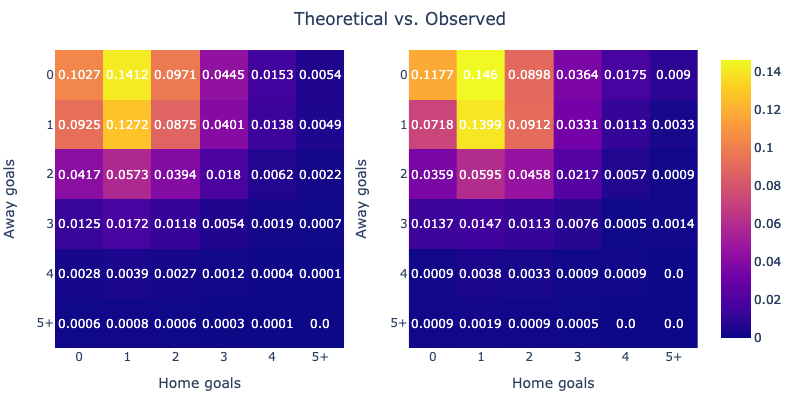

In [8]:
observed_data = np.zeros((max_goals + 1, max_goals + 1))
home_goals = 0
away_goals = 0
games = 0
for file in glob('data/BrazilianSoccerData/results/Serie_C/*/games.json'):
    with open(file, 'r') as f: data = json.load(f)
    for game in data:
        result = data[game]['Result'].upper().split(' X ')
        score_h, score_a = int(result[0]), int(result[1])
        
        games += 1
        home_goals += score_h
        away_goals += score_a
        observed_data[min(score_a, max_goals), min(score_h, max_goals)] += 1

home_mean, away_mean = home_goals / games, away_goals / games
poisson_home, poisson_away = poisson(home_mean), poisson(away_mean)
home_probs = [poisson_home.pmf(x) for x in [*range(max_goals)]]
away_probs = [poisson_away.pmf(x) for x in [*range(max_goals)]]
home_probs.append(1 - sum(home_probs))
away_probs.append(1 - sum(away_probs))
home_probs, away_probs = np.array(home_probs), np.array(away_probs)
theorical_data = np.zeros((max_goals + 1, max_goals + 1))
for i in range(max_goals + 1):
    for j in range(max_goals + 1):
        theorical_data[j, i] = home_probs[i] * away_probs[j]

observed_data = np.round(observed_data / games, decimals)
theorical_data = np.round(theorical_data, decimals)

labels = [f'{i}' for i in range(max_goals)] + [f'{max_goals}+']
z_min = min(np.min(theorical_data), np.min(observed_data))
z_max = max(np.max(theorical_data), np.max(observed_data))

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Heatmap(z=theorical_data, x=labels, y=labels, zmin=z_min, zmax=z_max, text=theorical_data, hoverinfo='text'), row=1, col=1)
fig.add_trace(go.Heatmap(z=observed_data, x=labels, y=labels, zmin=z_min, zmax=z_max), row=1, col=2)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=labels[j],
            y=labels[i],
            text=str(theorical_data[i][j]),
            showarrow=False,
            font=dict(color='white', size=12),
            xref='x1',
            yref='y1'
        )

        fig.add_annotation(
            x=labels[j],
            y=labels[i],
            text=str(observed_data[i][j]),
            showarrow=False,
            font=dict(color='white', size=12),
            xref='x2',
            yref='y2'
        )

fig.update_xaxes(side='top', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=1)
fig.update_yaxes(autorange='reversed', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=1)
fig.update_xaxes(side='top', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=2)
fig.update_yaxes(autorange='reversed', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=2)
fig.update_layout(
    xaxis=dict(side='bottom', title='Home goals'),
    yaxis=dict(autorange='reversed', title='Away goals'),
    xaxis2=dict(side='bottom', title='Home goals'),
    yaxis2=dict(autorange='reversed', title='Away goals'),
    title=dict(text='Theoretical vs. Observed', x=0.5)
)

fig.update_layout(height=400, width=800, margin=dict(l=50, r=50, t=50, b=50))
fig.show('png')

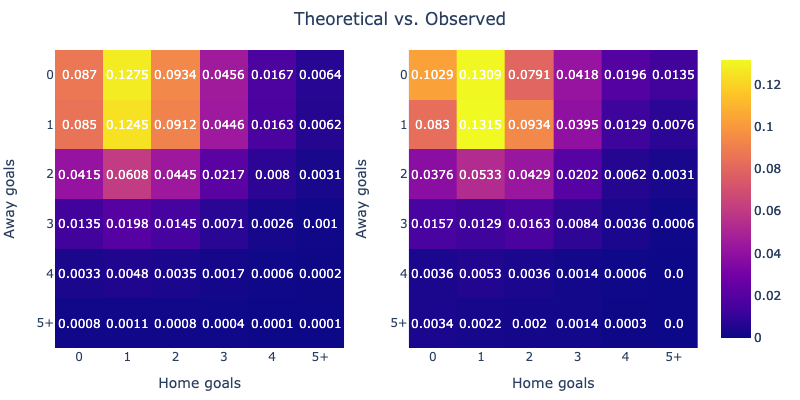

In [9]:
observed_data = np.zeros((max_goals + 1, max_goals + 1))
home_goals = 0
away_goals = 0
games = 0
for file in glob('data/BrazilianSoccerData/results/Serie_D/*/games.json'):
    with open(file, 'r') as f: data = json.load(f)
    for game in data:
        result = data[game]['Result'].upper().split(' X ')
        score_h, score_a = int(result[0]), int(result[1])
        
        games += 1
        home_goals += score_h
        away_goals += score_a
        observed_data[min(score_a, max_goals), min(score_h, max_goals)] += 1

home_mean, away_mean = home_goals / games, away_goals / games
poisson_home, poisson_away = poisson(home_mean), poisson(away_mean)
home_probs = [poisson_home.pmf(x) for x in [*range(max_goals)]]
away_probs = [poisson_away.pmf(x) for x in [*range(max_goals)]]
home_probs.append(1 - sum(home_probs))
away_probs.append(1 - sum(away_probs))
home_probs, away_probs = np.array(home_probs), np.array(away_probs)
theorical_data = np.zeros((max_goals + 1, max_goals + 1))
for i in range(max_goals + 1):
    for j in range(max_goals + 1):
        theorical_data[j, i] = home_probs[i] * away_probs[j]

observed_data = np.round(observed_data / games, decimals)
theorical_data = np.round(theorical_data, decimals)

labels = [f'{i}' for i in range(max_goals)] + [f'{max_goals}+']
z_min = min(np.min(theorical_data), np.min(observed_data))
z_max = max(np.max(theorical_data), np.max(observed_data))

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Heatmap(z=theorical_data, x=labels, y=labels, zmin=z_min, zmax=z_max, text=theorical_data, hoverinfo='text'), row=1, col=1)
fig.add_trace(go.Heatmap(z=observed_data, x=labels, y=labels, zmin=z_min, zmax=z_max), row=1, col=2)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=labels[j],
            y=labels[i],
            text=str(theorical_data[i][j]),
            showarrow=False,
            font=dict(color='white', size=12),
            xref='x1',
            yref='y1'
        )

        fig.add_annotation(
            x=labels[j],
            y=labels[i],
            text=str(observed_data[i][j]),
            showarrow=False,
            font=dict(color='white', size=12),
            xref='x2',
            yref='y2'
        )

fig.update_xaxes(side='top', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=1)
fig.update_yaxes(autorange='reversed', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=1)
fig.update_xaxes(side='top', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=2)
fig.update_yaxes(autorange='reversed', tickmode='array', tickvals=list(range(len(labels))), ticktext=labels, row=1, col=2)
fig.update_layout(
    xaxis=dict(side='bottom', title='Home goals'),
    yaxis=dict(autorange='reversed', title='Away goals'),
    xaxis2=dict(side='bottom', title='Home goals'),
    yaxis2=dict(autorange='reversed', title='Away goals'),
    title=dict(text='Theoretical vs. Observed', x=0.5)
)

fig.update_layout(height=400, width=800, margin=dict(l=50, r=50, t=50, b=50))
fig.show('png')